In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification

In [18]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

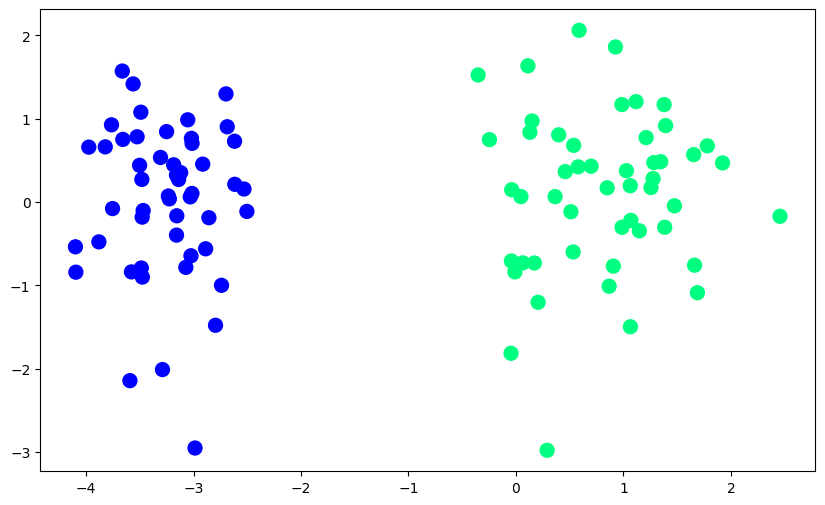

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [20]:
lor = LogisticRegression(penalty= None ,solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [21]:
print(lor.intercept_)
print(lor.coef_)

[5.78407424]
[[4.80759505 0.21038068]]


In [22]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [23]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [30]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights= np.ones(X.shape[1])
    lr=0.5

    for i in range(5000):
        y_hat=sigmoid(np.dot(X,weights))
        weights= weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]        # batch gradient descent

In [31]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [32]:
coef_,intercept_ = gd(X,y)

In [33]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [34]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

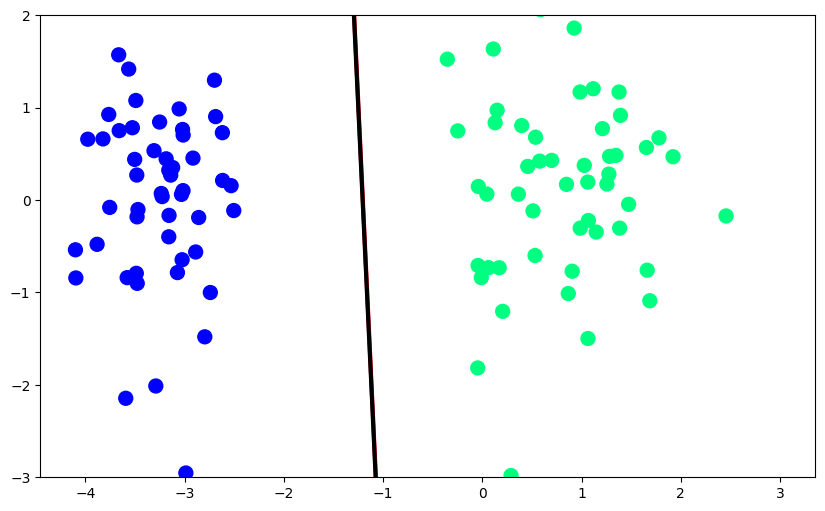

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)